# **Supply Chain Shipment Pricing Data - Data Analysis and Modeling**

### Importing packages

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Data and Exploring the DataSet

In [2]:
df = pd.read_csv('SCMS_Delivery_History_Dataset.csv')

In [3]:
df.head(10)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
5,23,112-NG-T01,Pre-PQ Process,SCMS-87,ASN-57,Nigeria,PMO - US,Direct Drop,EXW,Air,...,240,416,2225.60,5.35,0.02,"Aurobindo Unit III, India",Yes,504,5920.42,NaN
6,44,110-ZM-T01,Pre-PQ Process,SCMS-139,ASN-130,Zambia,PMO - US,Direct Drop,DDU,Air,...,90,135,4374.00,32.40,0.36,MSD South Granville Australia,Yes,328,Freight Included in Commodity Cost,NaN
7,45,109-TZ-T01,Pre-PQ Process,SCMS-140,ASN-94,Tanzania,PMO - US,Direct Drop,EXW,Air,...,60,16667,60834.55,3.65,0.06,"Aurobindo Unit III, India",Yes,1478,6212.41,NaN
8,46,112-NG-T01,Pre-PQ Process,SCMS-156,ASN-93,Nigeria,PMO - US,Direct Drop,EXW,Air,...,60,273,532.35,1.95,0.03,"Aurobindo Unit III, India",No,See ASN-93 (ID#:1281),See ASN-93 (ID#:1281),NaN
9,47,110-ZM-T01,Pre-PQ Process,SCMS-165,ASN-199,Zambia,PMO - US,Direct Drop,CIP,Air,...,120,2800,115080.00,41.10,0.34,ABBVIE (Abbott) St. P'burg USA,Yes,643,Freight Included in Commodity Cost,NaN


### Number of records in the dataset

In [6]:
TotalRowCount = len(df)
print("Total Number of Data Count :", TotalRowCount)

Total Number of Data Count : 10324


In [4]:
df.shape

(10324, 33)

### Datatypes of the columns

In [7]:
df.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


## Finding missing values

In [10]:
df.isna().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

### Shipment modes and their count

In [14]:
df['Shipment Mode'].unique(), df['Shipment Mode'].value_counts()

(array(['Air', nan, 'Truck', 'Air Charter', 'Ocean'], dtype=object),
 Air            6113
 Truck          2830
 Air Charter     650
 Ocean           371
 Name: Shipment Mode, dtype: int64)

## Analysis

# Total 10 Country wise count

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Country Name')

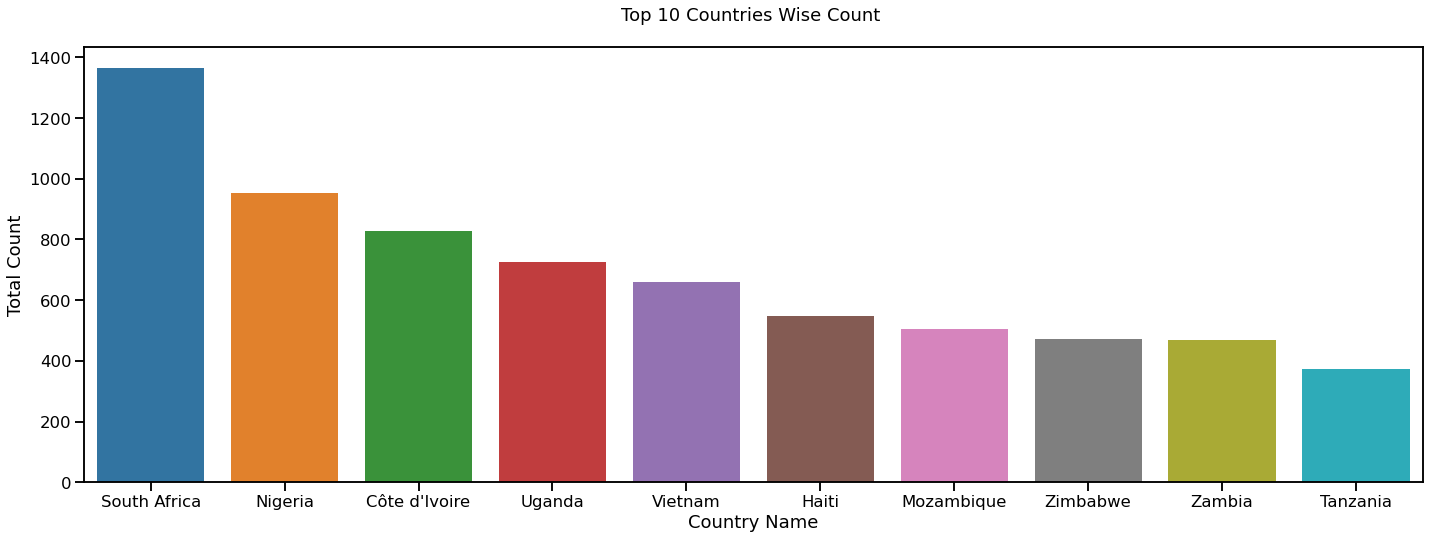

In [62]:
DataSet = df.dropna()
ItemCount = DataSet["Country"].value_counts().nlargest(15)
plt.figure(figsize=(24,8))
sns.countplot(DataSet['Country'],order = DataSet['Country'].value_counts().nlargest(10).index)
plt.title('Top 10 Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')

# Total Pack Price for Top 15 Countries

Text(0.5, 0, 'Country Name')

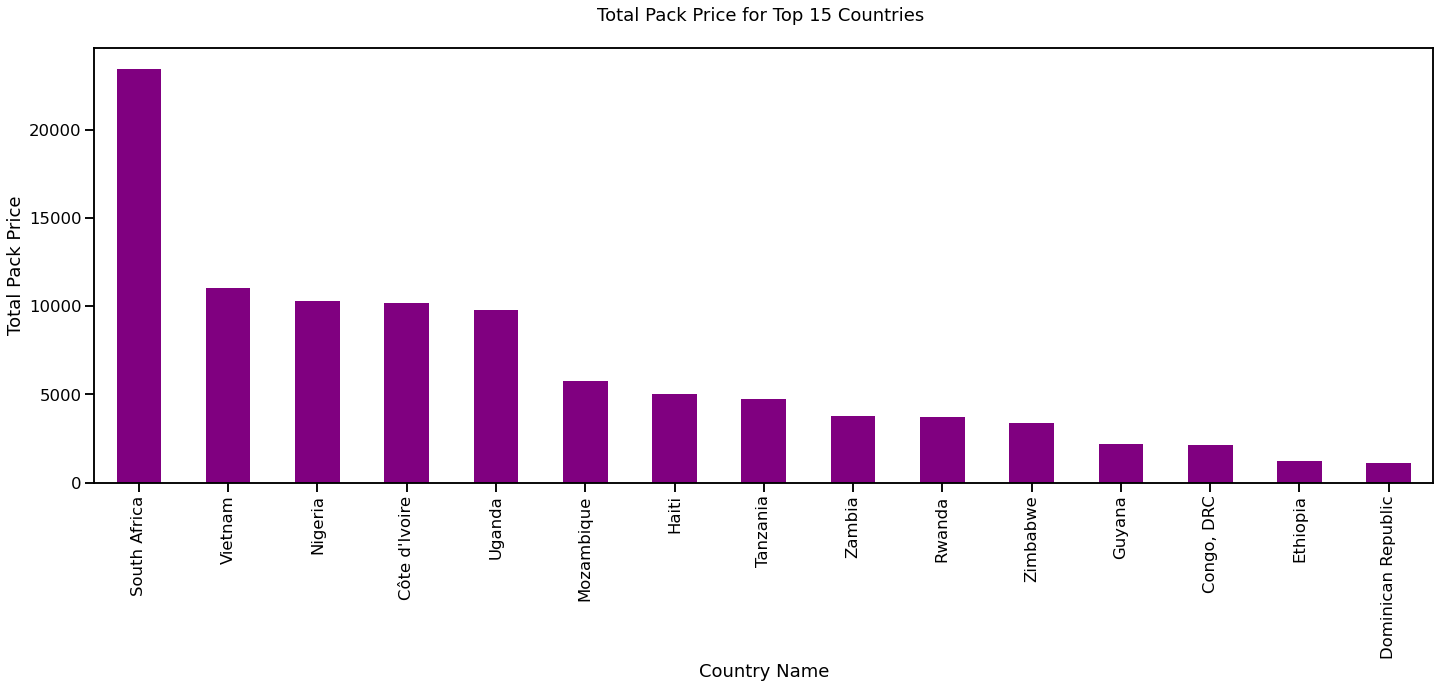

In [34]:
TotalPrice = DataSet.groupby(['Country'])['Pack Price'].sum().nlargest(15)
plt.figure(figsize=(24,8))
GraphData=DataSet.groupby(['Country'])['Pack Price'].sum().nlargest(15)
GraphData.plot(kind='bar',color='purple')
plt.title("Total Pack Price for Top 15 Countries \n")
plt.ylabel('Total Pack Price')
plt.xlabel('Country Name')

# First Line Designation Wise Count

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'First Line Designation')

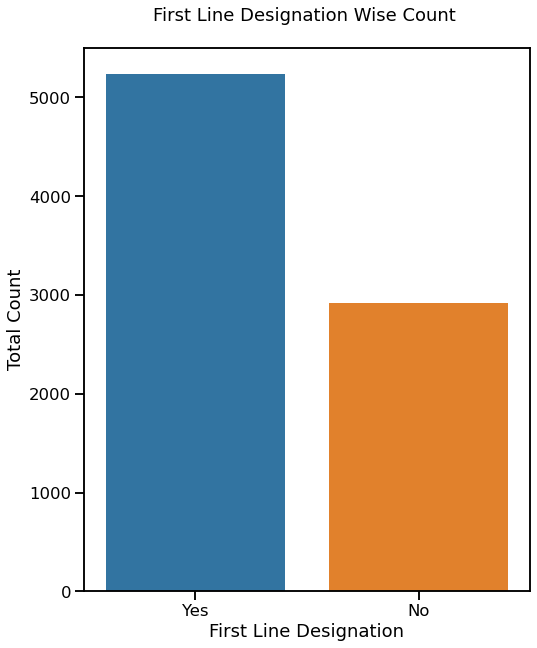

In [35]:
sns.set_context("talk",font_scale=1)
plt.figure(figsize=(8,10))
sns.countplot(DataSet['First Line Designation'],order = DataSet['First Line Designation'].value_counts().nlargest(10).index)
plt.title('First Line Designation Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('First Line Designation')

# Shipment Mode percentage wise Pie Chart and Bar chart

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



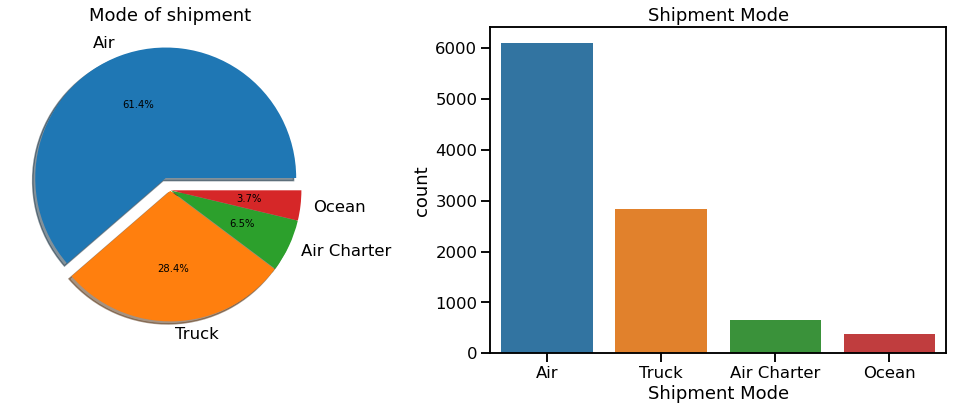

In [44]:
f,ax=plt.subplots(1,2,figsize=(18,6))
df['Shipment Mode'].value_counts().plot.pie(explode=[0.1,0.005,0.005,0.005],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Mode of shipment')
ax[0].set_ylabel('')
sns.countplot('Shipment Mode', data=df,ax=ax[1])
ax[1].set_title('Shipment Mode')
plt.show()

# Unquie Manufacturing Site Names

In [46]:
UniqueItem = DataSet['Manufacturing Site'].unique()
print("All Unique Manufacturing Site \n")
print(UniqueItem)

All Unique Manufacturing Site 

['BMS Meymac, France' 'Aurobindo Unit III, India'
 'ABBVIE Ludwigshafen Germany' 'Gilead(Nycomed) Oranienburg DE'
 'Ranbaxy, Paonta Shahib, India' 'Mylan (formerly Matrix) Nashik'
 'Roche Basel' 'GSK Ware (UK)' 'Novartis Pharma AG, Switzerland'
 'BI, Ingelheim, Germany' 'Ipca Dadra/Nagar Haveli IN' 'MSD, Haarlem, NL'
 'Aspen-OSD, Port Elizabeth, SA' 'ABBVIE (Abbott) Logis. UK'
 'Gland Pharma Ltd Pally Factory' 'Cipla, Goa, India'
 'GSK Mississauga (Canada)' 'GSK Aranda' 'Hetero Unit III Hyderabad IN'
 'ABBVIE (Abbott) France' 'Strides, Bangalore, India.'
 'GSK Cape Town Factory (South Africa)' "MSD Midrand, J'burg, SA"
 'Boehringer Ing., Koropi, GR' 'GSK Crawley'
 'Novartis Pharma Suffern, USA' 'Micro Labs Ltd. (Brown & Burk), India'
 'Meditab (for Cipla) Daman IN' 'Medopharm Malur Factory, INDIA'
 'Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ¸nland, 0133, Oslo, Norway'
 'MSD Manati, Puerto Rico, (USA)'
 'Emcure Plot No.P-2, I.T-B.T. Park, Phase II, MIDC

# Shipment Mode, Min and Mean value for Air

In [47]:
ItemData=DataSet[DataSet['Shipment Mode']=='Air']
print ("The Max Air Shipment Mode is :",ItemData['Unit of Measure (Per Pack)'].max())
print ("The Min Air Shipment is :",ItemData['Unit of Measure (Per Pack)'].min())
ItemTypeMean = ItemData['Unit of Measure (Per Pack)'].mean()
print ("The Mean Air Shipment is :", round(ItemTypeMean,2))

The Max Air Shipment Mode is : 1000
The Min Air Shipment is : 5
The Mean Air Shipment is : 89.33


## Total Pack Price for Top 15 Countries

Text(0.5, 0, 'Country Name')

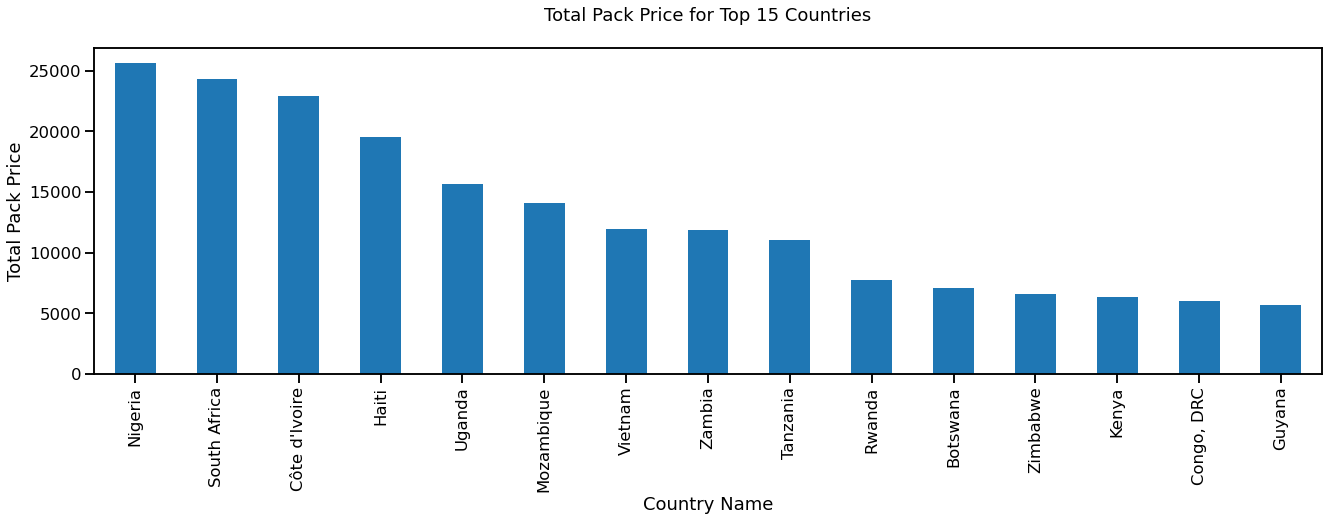

In [60]:
TotalPrice = df.groupby(['Country'])['Pack Price'].sum().nlargest(15)
plt.figure(figsize=(22,6))
GraphData=df.groupby(['Country'])['Pack Price'].sum().nlargest(15)
GraphData.plot(kind='bar')
plt.title("Total Pack Price for Top 15 Countries\n")
plt.ylabel('Total Pack Price')
plt.xlabel('Country Name')

## Shipment mode with pack price

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



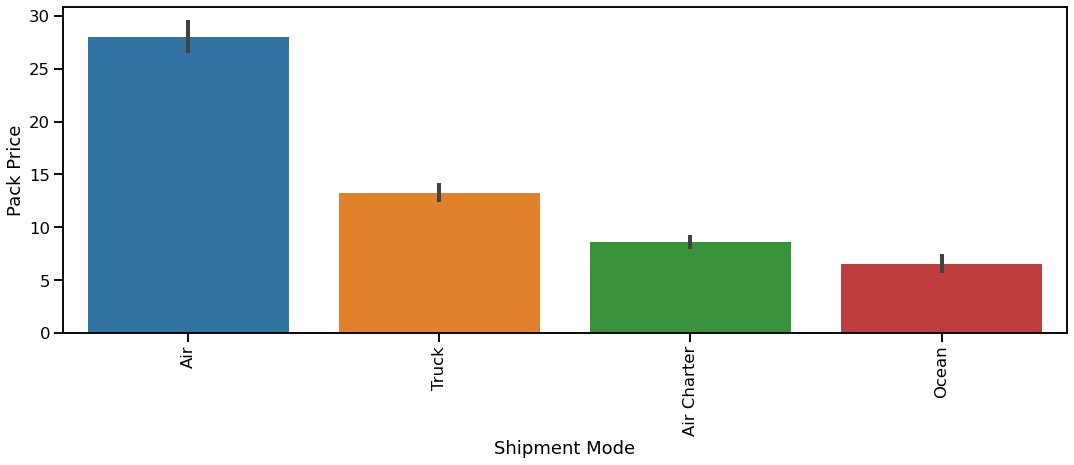

In [58]:
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sns.barplot('Shipment Mode','Pack Price', data = df)
plt.show()

## Shipment mode with unit price

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



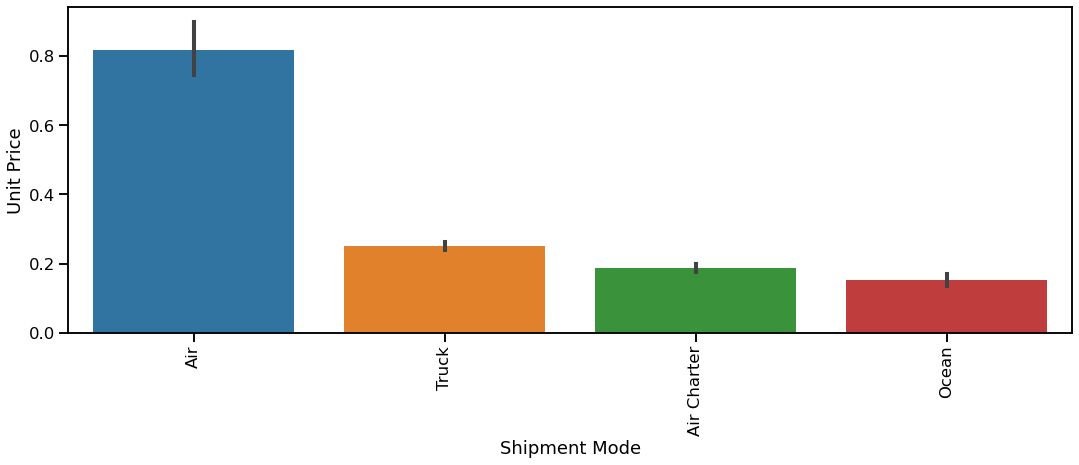

In [61]:
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sns.barplot('Shipment Mode','Unit Price', data = df)
plt.show()

# Top 5 Manufacturing Site for all Shipment Mode

Text(0.5, 0, 'Manufacturing Site Name')

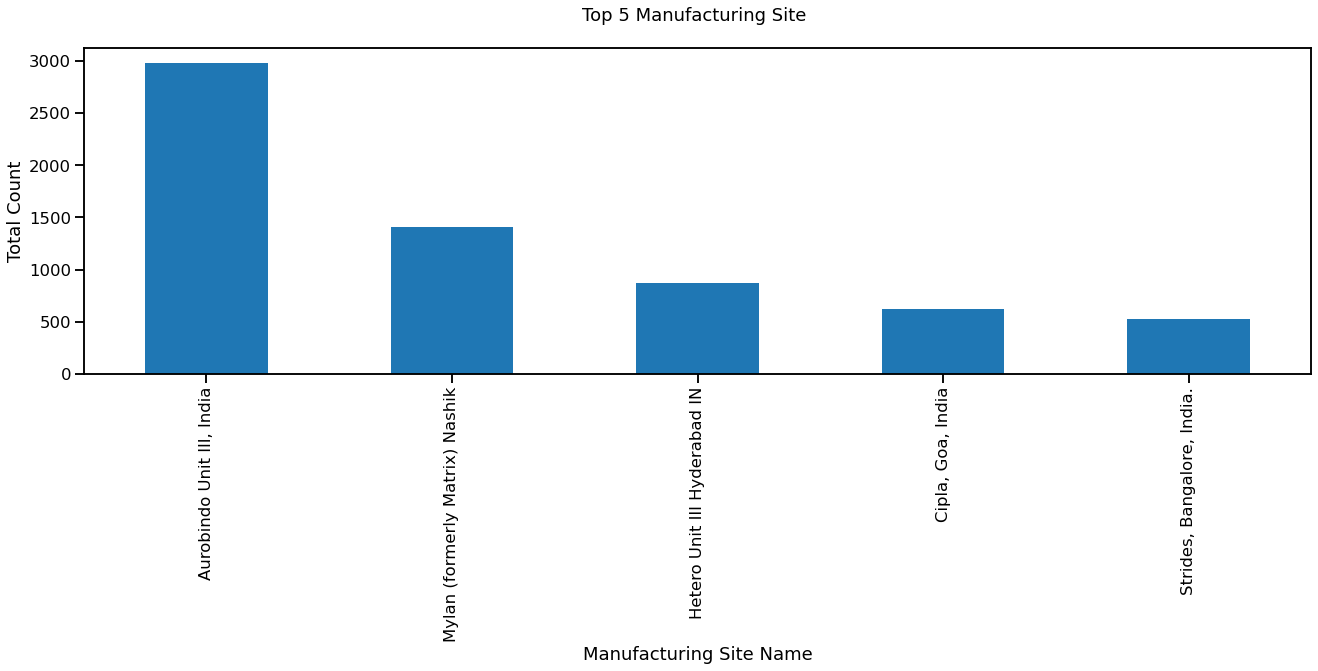

In [55]:
plt.figure(figsize=(22,6))
TopFiveManufacturingSite=DataSet.groupby('Manufacturing Site').size().nlargest(5)
TopFiveManufacturingSite.plot(kind='bar')
plt.title('Top 5 Manufacturing Site \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')

# Top 5 Manufacturing Site for Air Shipment Mode

Text(0.5, 0, 'Manufacturing Site')

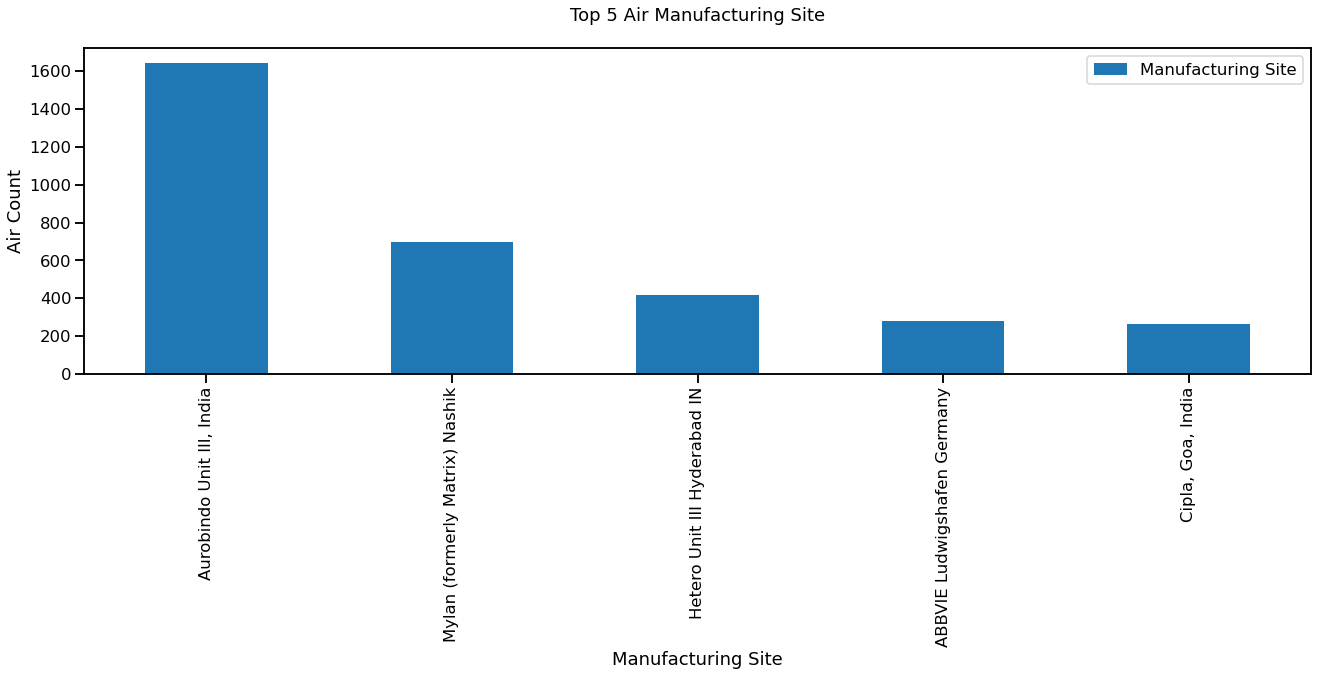

In [54]:
# Top 10 Air Shipment Mode in Bar Chart
ItemData=DataSet[DataSet['Shipment Mode']=='Air']
DataSet[DataSet["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:5].to_frame().plot.bar(figsize=(22,6))
ItemSupplier = DataSet[DataSet["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:5]
plt.title('Top 5 Air Manufacturing Site\n')
plt.ylabel('Air Count')
plt.xlabel('Manufacturing Site')

# Conclusion

* Top Country for Pack Price : Nigeria - 25,620.72
* Top Shipping Mode : Air
* The Max Air Shipment Mode is : 1000
* The Min Air Shipment is : 1
* The Mean Air Shipment is : 82.35
* Top Manufacturing Site : Aurobindo Unit III, India - 3172
* Top Air Manufacturing Site : Aurobindo Unit III, India - 1694